# Exploración Inicial de Datos - Tienda Aurelion

Este notebook realiza una exploración inicial de los datasets de la Tienda Aurelion para entender la estructura, calidad y características de los datos.

## Objetivos
- Cargar y examinar los 4 datasets principales
- Identificar tipos de datos y estructura
- Detectar valores faltantes o inconsistencias
- Generar estadísticas descriptivas básicas
- Crear visualizaciones exploratorias

## Datasets
- `productos.csv` - Catálogo maestro (100 registros)
- `clientes.csv` - Base de clientes (100 registros)
- `ventas.csv` - Transacciones principales (120 registros)
- `detalle_ventas.csv` - Desglose por producto (343 registros)


## Dependencias para análisis de datos

In [66]:
%pip install pandas numpy matplotlib seaborn plotly openpyxl matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 9.8 MB/s  0:00:03s eta 0:00:010:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

Librerías importadas correctamente


### Cargar datasets

In [58]:
print("Cargando datasets...\n")

productos = pd.read_csv('../data/csv/origin/productos.csv')
clientes = pd.read_csv('../data/csv/origin/clientes.csv')
ventas = pd.read_csv('../data/csv/origin/ventas.csv')
detalle_ventas = pd.read_csv('../data/csv/origin/detalle_ventas.csv')

clientes['fecha_alta'] = pd.to_datetime(clientes['fecha_alta'], format='%Y-%m-%d')
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

print("Datasets cargados exitosamente\n")
print(f"Productos:        {productos.shape[0]:3} registros × {productos.shape[1]} columnas")
print(f"Clientes:         {clientes.shape[0]:3} registros × {clientes.shape[1]} columnas")
print(f"Ventas:           {ventas.shape[0]:3} registros × {ventas.shape[1]} columnas")
print(f"Detalle ventas:   {detalle_ventas.shape[0]:3} registros × {detalle_ventas.shape[1]} columnas")

Cargando datasets...

Datasets cargados exitosamente

Productos:        100 registros × 4 columnas
Clientes:         100 registros × 5 columnas
Ventas:           120 registros × 6 columnas
Detalle ventas:   343 registros × 6 columnas


### Inspección de datasets

In [59]:
def inspeccionar_dataset(nombre, df):
    """
    Muestra estructura, tipos de datos y valores nulos de forma clara
    """
    print(f"\n{'='*70}")
    print(f"DATASET: {nombre.upper()}")
    print(f"{'='*70}")
    
    # Información básica
    print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    
    # Columnas y tipos
    print(f"\nEstructura:")
    info_df = pd.DataFrame({
        'Columna': df.columns,
        'Tipo': df.dtypes.values,
        'No Nulos': df.count().values,
        '% Nulos': ((df.isna().sum() / len(df)) * 100).round(2).values
    })
    display(info_df)
    
    # Vista previa
    print(f"\nPrimeros 3 registros:")
    display(df.head(3))
    
    return info_df

# Inspeccionar cada dataset
info_productos = inspeccionar_dataset('Productos', productos)
info_clientes = inspeccionar_dataset('Clientes', clientes)
info_ventas = inspeccionar_dataset('Ventas', ventas)
info_detalle = inspeccionar_dataset('Detalle Ventas', detalle_ventas)


DATASET: PRODUCTOS

Dimensiones: 100 filas × 4 columnas

Estructura:


,Columna,Tipo,No Nulos,% Nulos
0,id_producto,int64,100,0.0
1,nombre_producto,object,100,0.0
2,categoria,object,100,0.0
3,precio_unitario,int64,100,0.0



Primeros 3 registros:


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Alimentos,4973
2,3,Sprite 1.5L,Alimentos,4964



DATASET: CLIENTES

Dimensiones: 100 filas × 5 columnas

Estructura:


,Columna,Tipo,No Nulos,% Nulos
0,id_cliente,int64,100,0.0
1,nombre_cliente,object,100,0.0
2,email,object,100,0.0
3,ciudad,object,100,0.0
4,fecha_alta,datetime64[ns],100,0.0



Primeros 3 registros:


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03



DATASET: VENTAS

Dimensiones: 120 filas × 6 columnas

Estructura:


,Columna,Tipo,No Nulos,% Nulos
0,id_venta,int64,120,0.0
1,fecha,datetime64[ns],120,0.0
2,id_cliente,int64,120,0.0
3,nombre_cliente,object,120,0.0
4,email,object,120,0.0
5,medio_pago,object,120,0.0



Primeros 3 registros:


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta



DATASET: DETALLE VENTAS

Dimensiones: 343 filas × 6 columnas

Estructura:


,Columna,Tipo,No Nulos,% Nulos
0,id_venta,int64,343,0.0
1,id_producto,int64,343,0.0
2,nombre_producto,object,343,0.0
3,cantidad,int64,343,0.0
4,precio_unitario,int64,343,0.0
5,importe,int64,343,0.0



Primeros 3 registros:


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345


### Crear dataset consolidado

In [60]:
print("Creando tabla consolidada para análisis...\n")

# Join 1: Detalle + Productos (info del producto)
df_consolidado = detalle_ventas.merge(
    productos[['id_producto', 'nombre_producto', 'categoria']], 
    on='id_producto', 
    how='left',
    suffixes=('', '_prod')
)

# Join 2: + Ventas (fecha y medio de pago)
df_consolidado = df_consolidado.merge(
    ventas[['id_venta', 'fecha', 'medio_pago', 'id_cliente']], 
    on='id_venta', 
    how='left'
)

# Join 3: + Clientes (ciudad)
df_consolidado = df_consolidado.merge(
    clientes[['id_cliente', 'ciudad']], 
    on='id_cliente', 
    how='left'
)

# Agregar columnas derivadas para análisis temporal
df_consolidado['año'] = df_consolidado['fecha'].dt.year
df_consolidado['mes'] = df_consolidado['fecha'].dt.month
df_consolidado['mes_nombre'] = df_consolidado['fecha'].dt.strftime('%Y-%m')
df_consolidado['dia_semana'] = df_consolidado['fecha'].dt.day_name()
df_consolidado['trimestre'] = df_consolidado['fecha'].dt.quarter

# Reorganizar columnas para mejor legibilidad
columnas_ordenadas = [
    'id_venta', 'fecha', 'año', 'mes', 'mes_nombre', 'trimestre', 'dia_semana',
    'id_cliente', 'ciudad',
    'id_producto', 'nombre_producto', 'categoria',
    'cantidad', 'precio_unitario', 'importe',
    'medio_pago'
]

df_consolidado = df_consolidado[columnas_ordenadas]

print(f"Tabla consolidada creada: {df_consolidado.shape[0]} registros × {df_consolidado.shape[1]} columnas")

# Verificar completitud
print(f"\nVerificación de nulos en tabla consolidada:")
nulos_consolidado = df_consolidado.isna().sum()
if nulos_consolidado.sum() > 0:
    print("Valores nulos encontrados:")
    display(nulos_consolidado[nulos_consolidado > 0])
else:
    print("Sin valores nulos")

# Crear carpeta processed si no exeiste
processed_path = '../data/processed'
os.makedirs(processed_path, exist_ok=True)

# Guardar tabla consolidada
output_file = f'{processed_path}/datos_consolidados.csv'
df_consolidado.to_csv(output_file, index=False)

print(f"\nTabla consolidada guardada en: {output_file}")
print(f"   Tamaño del archivo: {os.path.getsize(output_file) / 1024:.2f} KB")

# Mostrar muestra
print(f"\nPrimeros 5 registros de la tabla consolidada:")
display(df_consolidado.head())

print(f"\nColumnas disponibles para análisis:")
for i, col in enumerate(df_consolidado.columns, 1):
    print(f"   {i:2}. {col}")

Creando tabla consolidada para análisis...

Tabla consolidada creada: 343 registros × 16 columnas

Verificación de nulos en tabla consolidada:
Sin valores nulos

Tabla consolidada guardada en: ../data/processed/datos_consolidados.csv
   Tamaño del archivo: 35.42 KB

Primeros 5 registros de la tabla consolidada:


,id_venta,fecha,año,mes,mes_nombre,trimestre,dia_semana,id_cliente,ciudad,id_producto,nombre_producto,categoria,cantidad,precio_unitario,importe,medio_pago
0,1,2024-06-19,2024,6,2024-06,2,Wednesday,62,Carlos Paz,90,Toallas Húmedas x50,Limpieza,1,2902,2902,tarjeta
1,2,2024-03-17,2024,3,2024-03,1,Sunday,49,Rio Cuarto,82,Aceitunas Negras 200g,Alimentos,5,2394,11970,qr
2,2,2024-03-17,2024,3,2024-03,1,Sunday,49,Rio Cuarto,39,Helado Vainilla 1L,Alimentos,5,469,2345,qr
3,2,2024-03-17,2024,3,2024-03,1,Sunday,49,Rio Cuarto,70,Fernet 750ml,Alimentos,2,4061,8122,qr
4,2,2024-03-17,2024,3,2024-03,1,Sunday,49,Rio Cuarto,22,Medialunas de Manteca,Alimentos,1,2069,2069,qr



Columnas disponibles para análisis:
    1. id_venta
    2. fecha
    3. año
    4. mes
    5. mes_nombre
    6. trimestre
    7. dia_semana
    8. id_cliente
    9. ciudad
   10. id_producto
   11. nombre_producto
   12. categoria
   13. cantidad
   14. precio_unitario
   15. importe
   16. medio_pago


## 📊 Visualizaciones Exploratorias

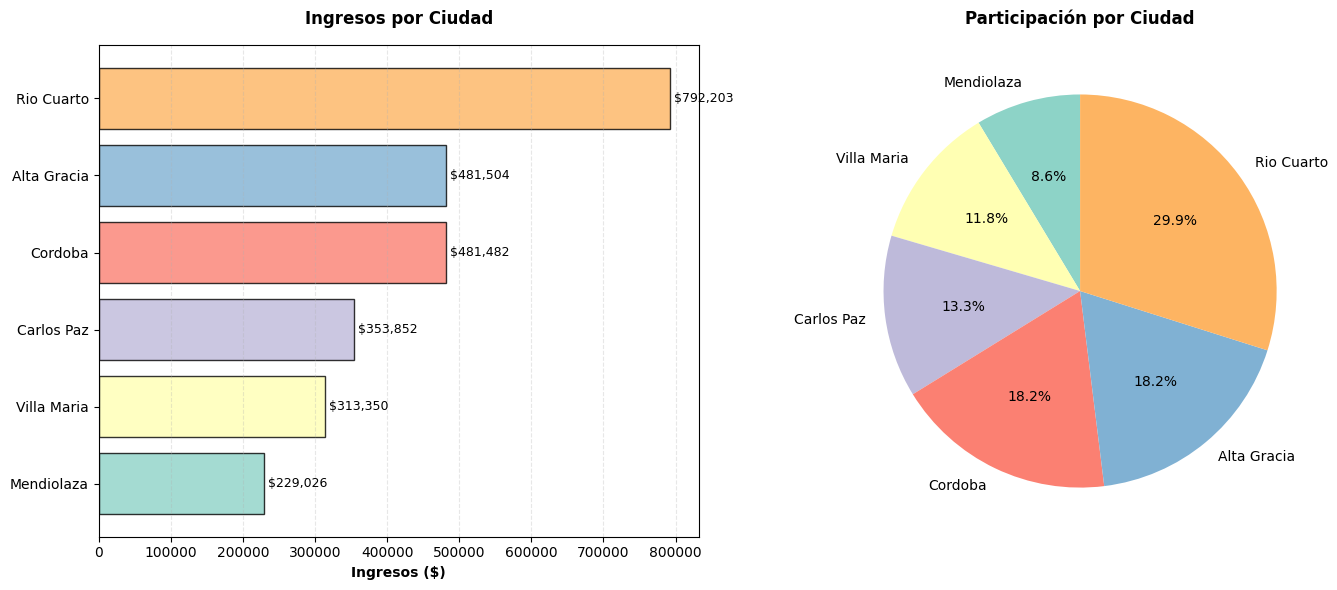

Distribución geográfica:
• Ciudad líder: Rio Cuarto con $792,203
• Representa el 29.9% del total


In [61]:
# Análisis de Distribución Geográfica
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ingresos por ciudad
ciudad_ingresos = df_consolidado.groupby('ciudad')['importe'].sum().sort_values(ascending=True)
colors = plt.cm.Set3(range(len(ciudad_ingresos)))

axes[0].barh(ciudad_ingresos.index, ciudad_ingresos.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Ingresos ($)', fontweight='bold')
axes[0].set_title('Ingresos por Ciudad', fontsize=12, fontweight='bold', pad=15)
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

for i, v in enumerate(ciudad_ingresos.values):
    axes[0].text(v, i, f' ${v:,.0f}', va='center', fontsize=9)

# Distribución porcentual
axes[1].pie(ciudad_ingresos.values, labels=ciudad_ingresos.index, autopct='%1.1f%%',
            startangle=90, colors=colors)
axes[1].set_title('Participación por Ciudad', fontsize=12, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

print(f"Distribución geográfica:")
print(f"• Ciudad líder: {ciudad_ingresos.index[-1]} con ${ciudad_ingresos.values[-1]:,.0f}")
print(f"• Representa el {(ciudad_ingresos.values[-1] / ciudad_ingresos.sum() * 100):.1f}% del total")

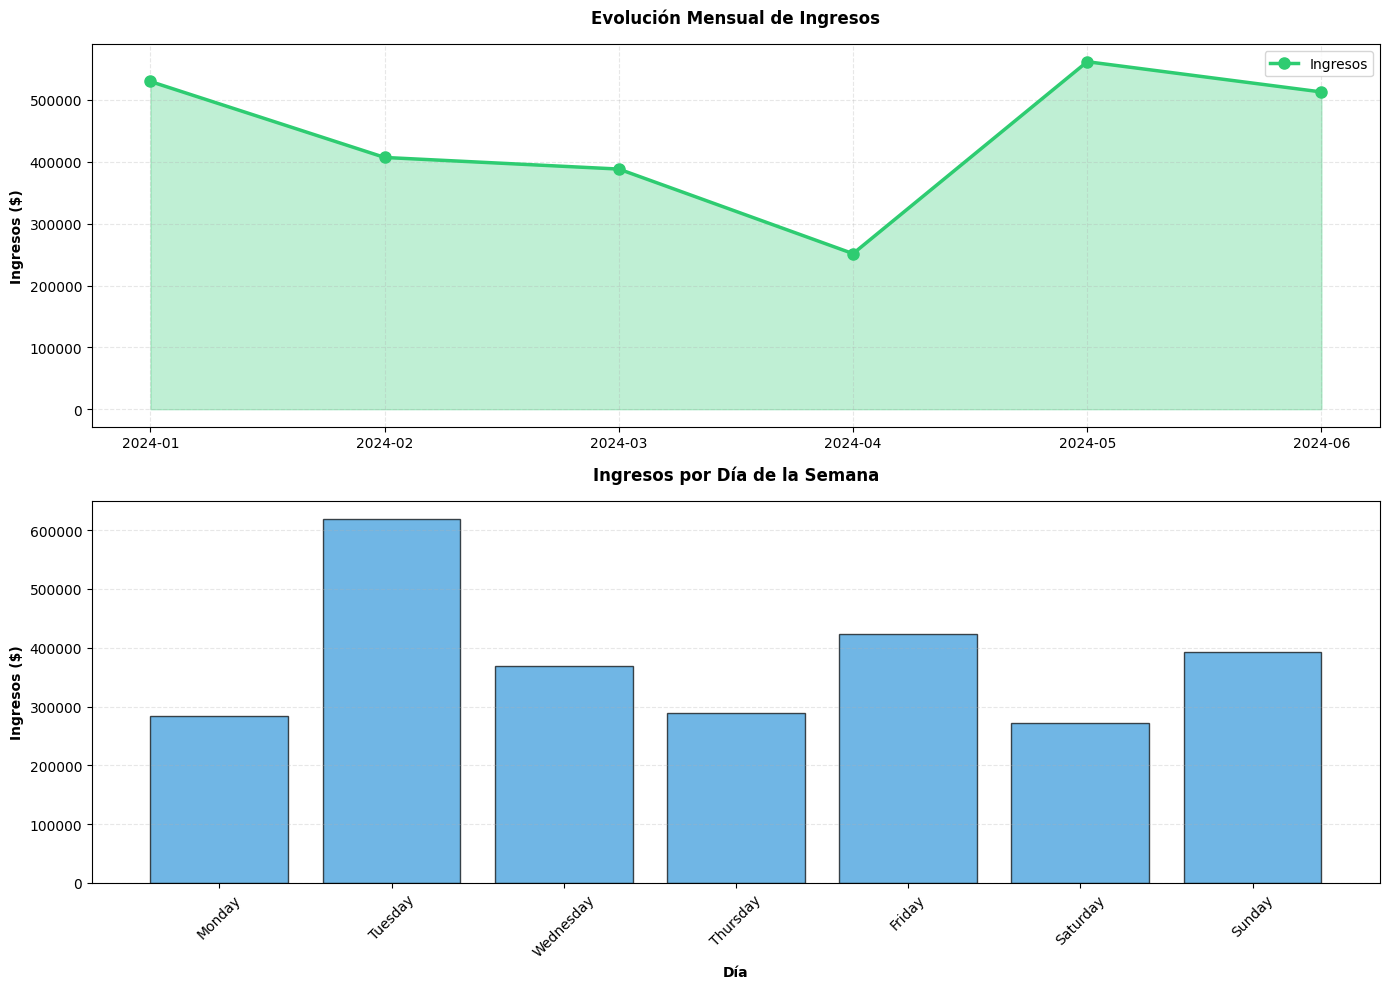

Insights temporales:
• Mes con mayores ingresos: 2024-05
• Día con mayores ingresos: Tuesday


In [62]:
# Distribución Temporal de Ventas
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Ventas por mes
ventas_mes = df_consolidado.groupby('mes_nombre').agg({'importe': 'sum', 'id_venta': 'nunique'}).reset_index()
ventas_mes = ventas_mes.sort_values('mes_nombre')

axes[0].plot(ventas_mes['mes_nombre'], ventas_mes['importe'], marker='o', linewidth=2.5, 
             markersize=8, color='#2ecc71', label='Ingresos')
axes[0].fill_between(range(len(ventas_mes)), ventas_mes['importe'], alpha=0.3, color='#2ecc71')
axes[0].set_title('Evolución Mensual de Ingresos', fontsize=12, fontweight='bold', pad=15)
axes[0].set_ylabel('Ingresos ($)', fontweight='bold')
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].legend()

# Distribución por día de la semana
ventas_dia = df_consolidado.groupby('dia_semana')['importe'].sum().reset_index()
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia['dia_semana'] = pd.Categorical(ventas_dia['dia_semana'], categories=dias_orden, ordered=True)
ventas_dia = ventas_dia.sort_values('dia_semana')

axes[1].bar(ventas_dia['dia_semana'], ventas_dia['importe'], color='#3498db', edgecolor='black', alpha=0.7)
axes[1].set_title('Ingresos por Día de la Semana', fontsize=12, fontweight='bold', pad=15)
axes[1].set_ylabel('Ingresos ($)', fontweight='bold')
axes[1].set_xlabel('Día', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("Insights temporales:")
print(f"• Mes con mayores ingresos: {ventas_mes.loc[ventas_mes['importe'].idxmax(), 'mes_nombre']}")
print(f"• Día con mayores ingresos: {ventas_dia.loc[ventas_dia['importe'].idxmax(), 'dia_semana']}")

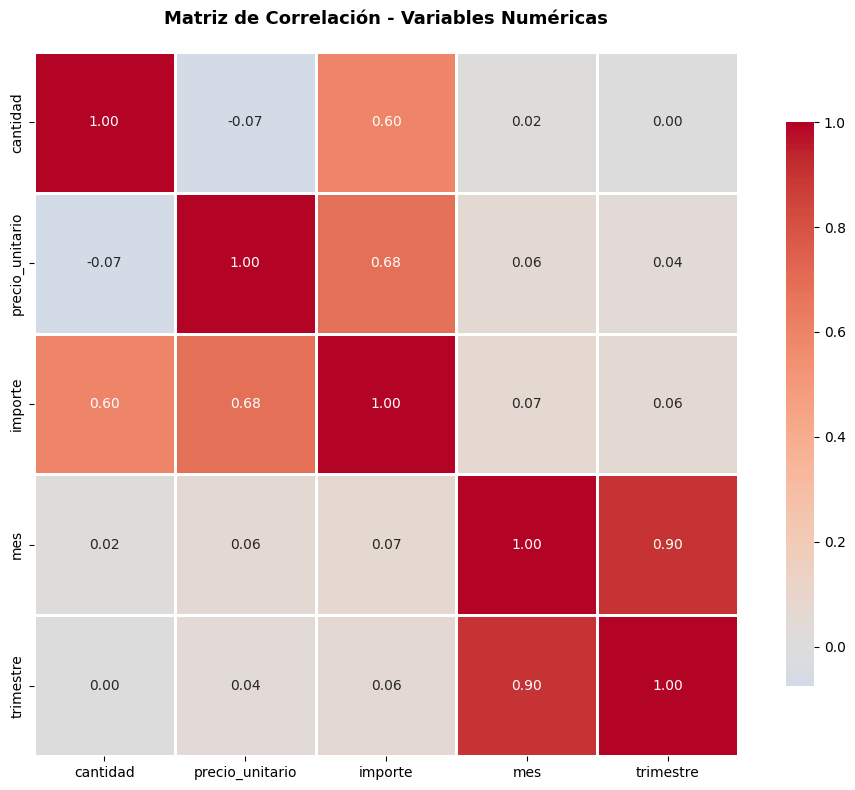

Correlaciones destacadas:
• Cantidad vs Importe: 0.60 (correlación alta esperada)
• Precio Unitario vs Importe: 0.68
• Cantidad vs Precio: -0.07


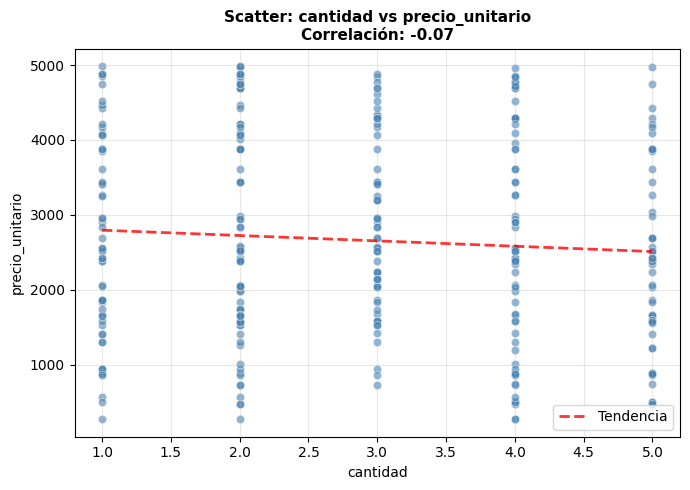

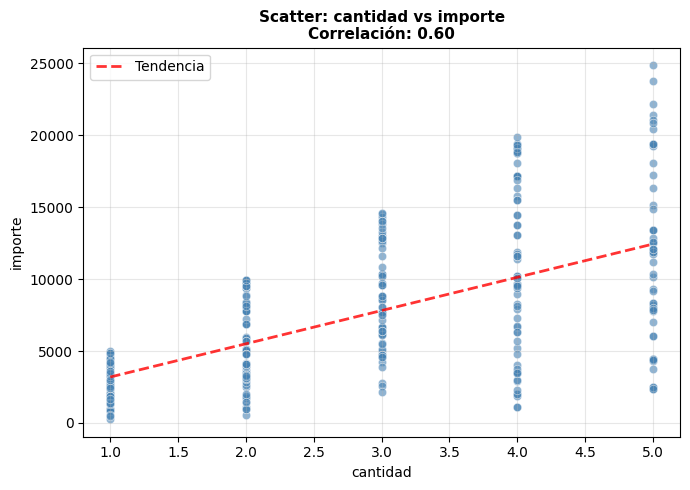

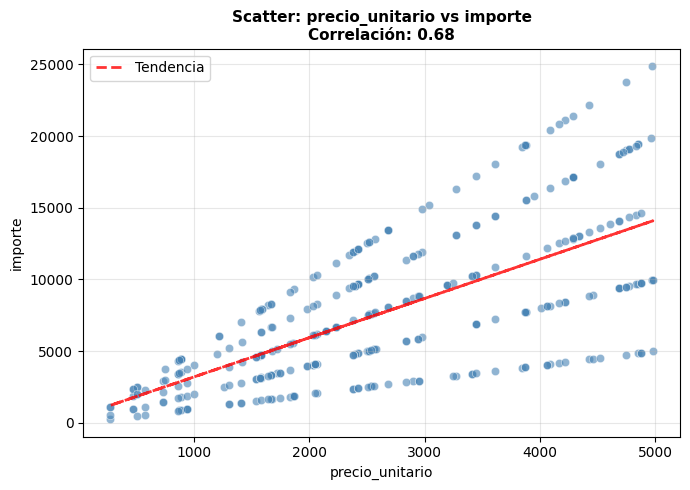

In [63]:
# Matriz de Correlación
fig, ax = plt.subplots(figsize=(10, 8))

# Seleccionar variables numéricas del dataset consolidado
correlacion_data = df_consolidado[['cantidad', 'precio_unitario', 'importe', 'mes', 'trimestre']].corr()

# Crear heatmap
sns.heatmap(correlacion_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matriz de Correlación - Variables Numéricas', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("Correlaciones destacadas:")
print(f"• Cantidad vs Importe: {correlacion_data.loc['cantidad', 'importe']:.2f} (correlación alta esperada)")
print(f"• Precio Unitario vs Importe: {correlacion_data.loc['precio_unitario', 'importe']:.2f}")
print(f"• Cantidad vs Precio: {correlacion_data.loc['cantidad', 'precio_unitario']:.2f}")

# ====================================================================
# SCATTER PLOTS
# ====================================================================

# Scatter: cantidad vs precio_unitario
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_consolidado, x='cantidad', y='precio_unitario', alpha=0.6, color='steelblue')
mask_valid = df_consolidado[['cantidad', 'precio_unitario']].notna().all(axis=1)
if mask_valid.sum() > 1:
    x_vals = df_consolidado.loc[mask_valid, 'cantidad']
    y_vals = df_consolidado.loc[mask_valid, 'precio_unitario']
    z = np.polyfit(x_vals, y_vals, 1)
    p = np.poly1d(z)
    plt.plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, label='Tendencia')
    plt.legend()
corr_val = correlacion_data.loc['cantidad', 'precio_unitario']
plt.title(f'Scatter: cantidad vs precio_unitario\nCorrelación: {corr_val:.2f}', fontsize=11, fontweight='bold')
plt.xlabel('cantidad')
plt.ylabel('precio_unitario')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Scatter: cantidad vs importe
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_consolidado, x='cantidad', y='importe', alpha=0.6, color='steelblue')
mask_valid = df_consolidado[['cantidad', 'importe']].notna().all(axis=1)
if mask_valid.sum() > 1:
    x_vals = df_consolidado.loc[mask_valid, 'cantidad']
    y_vals = df_consolidado.loc[mask_valid, 'importe']
    z = np.polyfit(x_vals, y_vals, 1)
    p = np.poly1d(z)
    plt.plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, label='Tendencia')
    plt.legend()
corr_val = correlacion_data.loc['cantidad', 'importe']
plt.title(f'Scatter: cantidad vs importe\nCorrelación: {corr_val:.2f}', fontsize=11, fontweight='bold')
plt.xlabel('cantidad')
plt.ylabel('importe')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Scatter: precio_unitario vs importe
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_consolidado, x='precio_unitario', y='importe', alpha=0.6, color='steelblue')
mask_valid = df_consolidado[['precio_unitario', 'importe']].notna().all(axis=1)
if mask_valid.sum() > 1:
    x_vals = df_consolidado.loc[mask_valid, 'precio_unitario']
    y_vals = df_consolidado.loc[mask_valid, 'importe']
    z = np.polyfit(x_vals, y_vals, 1)
    p = np.poly1d(z)
    plt.plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, label='Tendencia')
    plt.legend()
corr_val = correlacion_data.loc['precio_unitario', 'importe']
plt.title(f'Scatter: precio_unitario vs importe\nCorrelación: {corr_val:.2f}', fontsize=11, fontweight='bold')
plt.xlabel('precio_unitario')
plt.ylabel('importe')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

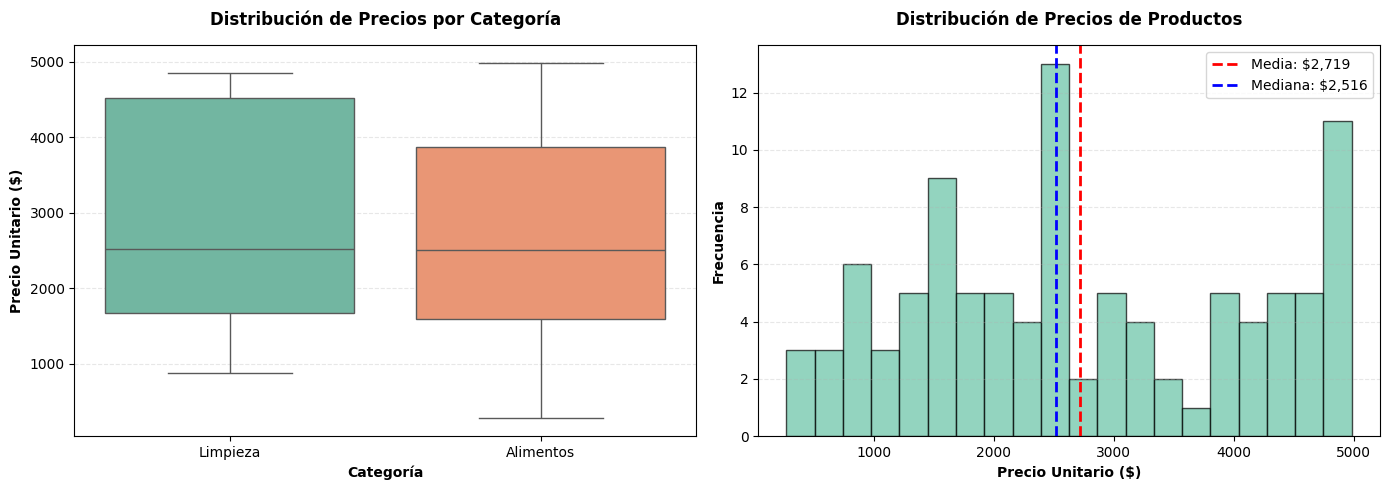

Interpretación:
- Rango de precios: $272 - $4,982
- La categoría Limpieza tiene precios ligeramente más altos en promedio
- Distribución relativamente uniforme de precios


In [64]:
# Distribución de Precios por Categoría
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot de precios por categoría
productos_merged = detalle_ventas.merge(productos[['id_producto', 'categoria']], on='id_producto')
sns.boxplot(data=productos_merged, x='categoria', y='precio_unitario', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución de Precios por Categoría', fontsize=12, fontweight='bold', pad=15)
axes[0].set_ylabel('Precio Unitario ($)', fontweight='bold')
axes[0].set_xlabel('Categoría', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Histogram de precios
axes[1].hist(productos['precio_unitario'], bins=20, color='#66c2a5', edgecolor='black', alpha=0.7)
axes[1].axvline(productos['precio_unitario'].mean(), color='red', linestyle='--', linewidth=2, label=f"Media: ${productos['precio_unitario'].mean():,.0f}")
axes[1].axvline(productos['precio_unitario'].median(), color='blue', linestyle='--', linewidth=2, label=f"Mediana: ${productos['precio_unitario'].median():,.0f}")
axes[1].set_title('Distribución de Precios de Productos', fontsize=12, fontweight='bold', pad=15)
axes[1].set_xlabel('Precio Unitario ($)', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"Interpretación:")
print(f"- Rango de precios: ${productos['precio_unitario'].min():,} - ${productos['precio_unitario'].max():,}")
print(f"- La categoría Limpieza tiene precios ligeramente más altos en promedio")
print(f"- Distribución relativamente uniforme de precios")

In [65]:
print("="*70)
print("RESUMEN EJECUTIVO - EXPLORACIÓN INICIAL")
print("="*70)

print(f"\nDATASETS VALIDADOS:")
print(f"• {len(productos)} productos en {productos['categoria'].nunique()} categorías")
print(f"• {len(clientes)} clientes distribuidos en {clientes['ciudad'].nunique()} ciudades")
print(f"• {len(ventas)} ventas realizadas")
print(f"• {len(detalle_ventas)} líneas de detalle (productos vendidos)")

print(f"\nMÉTRICAS CLAVE:")
total_ingresos = df_consolidado['importe'].sum()
ticket_promedio = df_consolidado.groupby('id_venta')['importe'].sum().mean()
productos_por_venta = df_consolidado.groupby('id_venta').size().mean()

print(f"• Ingresos totales: ${total_ingresos:,.0f}")
print(f"• Ticket promedio: ${ticket_promedio:,.0f}")
print(f"• Productos por venta (promedio): {productos_por_venta:.1f}")
print(f"• Precio unitario promedio: ${productos['precio_unitario'].mean():,.0f}")
print(f"• Cantidad promedio por línea: {df_consolidado['cantidad'].mean():.1f} unidades")

print(f"\nTOP 3 CATEGORÍAS POR INGRESOS:")
top_categorias = df_consolidado.groupby('categoria')['importe'].sum().sort_values(ascending=False).head(3)
for i, (cat, monto) in enumerate(top_categorias.items(), 1):
    print(f"{i}. {cat}: ${monto:,.0f}")

print(f"\nTOP 3 CIUDADES POR VOLUMEN:")
top_ciudades = df_consolidado.groupby('ciudad')['importe'].sum().sort_values(ascending=False).head(3)
for i, (ciudad, monto) in enumerate(top_ciudades.items(), 1):
    print(f"{i}. {ciudad}: ${monto:,.0f}")
    
print(f"\n{'='*70}")
print("EXPLORACIÓN INICIAL COMPLETADA")
print("="*70)

RESUMEN EJECUTIVO - EXPLORACIÓN INICIAL

DATASETS VALIDADOS:
• 100 productos en 2 categorías
• 100 clientes distribuidos en 6 ciudades
• 120 ventas realizadas
• 343 líneas de detalle (productos vendidos)

MÉTRICAS CLAVE:
• Ingresos totales: $2,651,417
• Ticket promedio: $22,095
• Productos por venta (promedio): 2.9
• Precio unitario promedio: $2,719
• Cantidad promedio por línea: 3.0 unidades

TOP 3 CATEGORÍAS POR INGRESOS:
1. Alimentos: $2,289,386
2. Limpieza: $362,031

TOP 3 CIUDADES POR VOLUMEN:
1. Rio Cuarto: $792,203
2. Alta Gracia: $481,504
3. Cordoba: $481,482

EXPLORACIÓN INICIAL COMPLETADA
